# SEIR model - Example
### Loading the libraries
To import RBM_seir module, we add the path where RBM_seir.py is located; in this case *"../cv19gm/"*.  
(or we can install EpicSuit in the system path)

In [1]:
import sys
if('../cv19gm' not in sys.path):
    sys.path.append('../cv19gm')

This module will import KaXim python bindings and will link (using ld) to KaXim library.  
We may need to install KaXim library in the system path or add its location (folder with libKaXim.so) to $LD_LIBRARY_PATH.

!important: env var has to be set before jupyter notebook runs

In [2]:
!head '../cv19gm/RBM.py'


import toml
import os
import sys
dirname = os.path.dirname(__file__)
if(dirname+"/../lib" not in sys.path):
	sys.path.insert(1,dirname+"/../lib")
#import KaXimDebug as KaXim
import KaXimDebug as KaXim
import numpy as np


In [3]:
!echo $LD_LIBRARY_PATH
import RBM

### Initialize a model
Using a model configuration file (.toml), you can load an RBM Kappa model from the available base models (located in "../cv19gm/kappa").

In [4]:
!ls "../cv19gm/kappa"

SEIR-base.xka	      SEIR-by_age.xka	SEIRHVD_v2.xka
SEIR-by_age-vac1.xka  SEIRHVD-meta.xka	SEIRHVDv3.3.ka3
SEIR-by_age-vac2.xka  SEIRHVD_v1.xka	SEIRHVD.xka


The name value in the configuration file determines which kappa model to load. The parameters of the model will be set using the configuration file.

In [5]:
cfg = "../cfg-files/SEIR.toml"
!cat $cfg | grep "name ="
model = RBM.SEIR(cfg)  #Load kappa model using cfg file

	name = "SEIR"


##### Parameters
To check which are the parameters for this model use the function *paramInfo()*.  
You can use the name or an alias of a parameter to set its value using the config file *(.toml)*.  
Alias can have some special behavior, like been interpreted as a percentage of population when a float value is used.  
If a parameter doesn't have a default value, its a mandatory parameter.

In [6]:
info = RBM.SEIR.paramInfo()

    Name        Alias       Default  Dynamic    Description
--  ----------  --------  ---------  ---------  -------------------------------------------------------------------------------------------------------------------
 0  population                  nan  False      Initial population
 1  I_0         I                 1  False      Initial infected, [I] as % of population if a [0,1] value is given
 2  E_0         mu E              0  False      Initial exposed, [mu] as % of I_0, [E]  as % of population if a [0,1] value is given
 3  R_0         R                 0  False      Initial recovered, [R] as % of population if a [0,1] value is given
 4  D_0         D                 0  False      Initial dead, [D] as % of population if a [0,1] value is given
 5  S_f         Flux S_f          0  True       Suscp. flux, [Flux] as a % of S_0 if [0,1] value else as S_0/population % of Flux, [S_f] as % of S_0 if [0,1] value
 6  E_f         Flux E_f          0  True       Expsd. flux, [Flux] as

### Running a simulation using EpicSuit Library
Some arguments can be given to *kappa_sim()*: first argument is verbose level, *time* is the simulation time in days, and *runs* is the number of time-trajectories to get an average.

In [7]:
result = model.kappa_sim(verbose=6,time = 200,runs = 1)

{'-i': '../cv19gm/kappa/SEIR-base.xka', '-r': '1', '-t': '200', '-p': '200', '--verbose': '6'}

c++: cout verbose
c++: clog verbose
Temp-file was already closed.


The result object is used to acquaire all the information about the simulations done.  
Every data that has been acquired will be stored in result objet.

In [8]:
avg,sd = result.getAvgTrajectory()    #gets the average trajectory and its std. deviation
result.getTabs()     #all the data needed to calculate Average

{'Average Trajectory': [<KaXimDebug.DataTable at 0x7f9b4f83cab0>],
 'SD': [<KaXimDebug.DataTable at 0x7f9b1d733b70>],
 'Trajectory': [<KaXimDebug.DataTable at 0x7f9b1d6cd3f0>]}

Time trajectories show how some selected variables (aka observables) change in time.  
The observables os this simulation are:

In [9]:
avg_df = avg.asDataFrame()
avg_df.columns

Index(['Susceptible', 'Exposed', 'Infected', 'Removed', 'Daily Exposed',
       'Daily Infected', 'Daily Removed', 'Daily Inmunized'],
      dtype='object')

You can select the more important observables to make your plot easier to understand.

<AxesSubplot:>

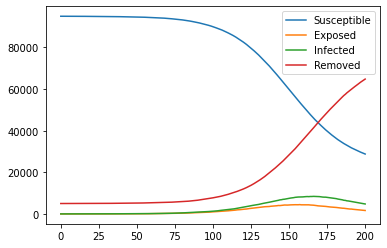

In [10]:
avg_df[model.STATES_NAMES].plot()